asdasdasdasd

# Import Libraries

In [52]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from pandas.core.indexers import check_array_indexer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


import json

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Loading

In [5]:
# Load Data
data = pd.read_csv('PRDECT-ID Dataset.csv')
data.head(5)

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


In [7]:
data.describe(include='O')

,Category,Product Name,Location,Customer Review,Sentiment,Emotion
count,5400,5400,5400,5400,5400,5400
unique,29,1308,61,5305,2,5
top,Computers and Laptops,Minigold Black Series Logam Mulia Koin Emas Mi...,Jakarta Barat,Kualitas Produk Bagus.,Negative,Happy
freq,200,25,1293,4,2821,1770


# EDA

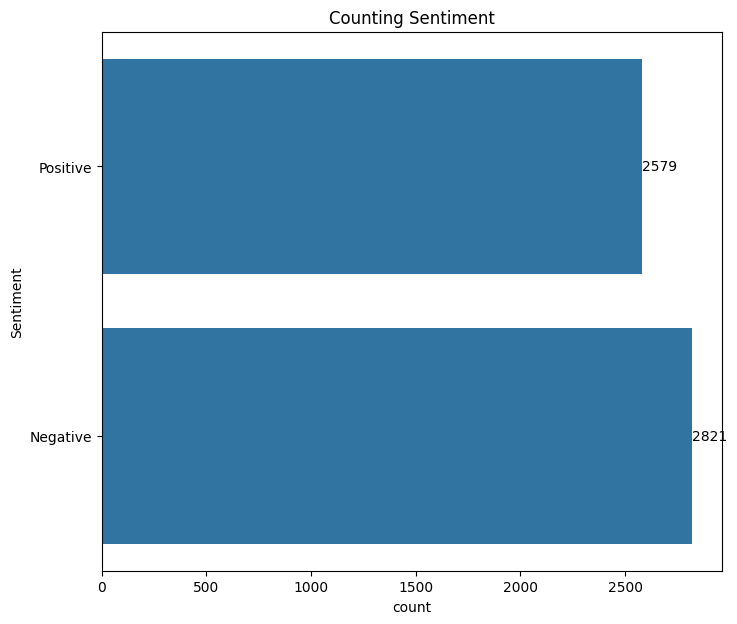

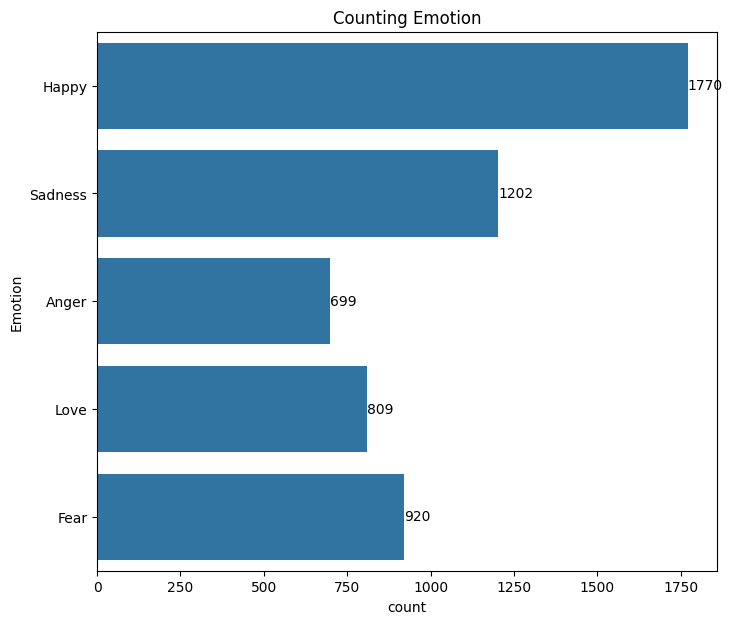

In [8]:
columns = ['Sentiment', 'Emotion']
for col in columns:
    plt.figure(figsize=(8,7))
    ax = sns.countplot(y=data[col])
    for label in ax.containers:
        ax.bar_label(label)
    plt.title(f'Counting {col}')
    plt.show()

# Feature Engineering

#### **Check Duplicate**

In [11]:
# Cek data duplikat
data.duplicated().sum()

7

In [14]:
data_duplicates = data.drop_duplicates(keep='first')

In [15]:
data_duplicates.duplicated().sum()

0

In [27]:
# Mengganti spasi menjadi garis bawah (_) dan merubah nama kolom menjadi lowercase pada DataFrame data_duplicates
data_duplicates.columns = data_duplicates.columns.str.replace(' ', '_').str.lower()
data_duplicates.head(5)

,category,product_name,location,price,overall_rating,number_sold,total_review,customer_rating,customer_review,sentiment,emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [30]:
data_cleaned = data_duplicates.copy()

#### **Handling Missing value**

In [32]:
# Cek missing values
data_cleaned[data_cleaned[['sentiment', 'customer_review']].isnull().any(axis=1)]

,category,product_name,location,price,overall_rating,number_sold,total_review,customer_rating,customer_review,sentiment,emotion


#### **Pre-processing Reviews: Checking Mentions and Hashtags**

In [33]:
# Mencari mention dalam review_text
data_cleaned['customer_review'].loc[data_cleaned['customer_review'].str.contains(r"@[A-Za-z0-9_]+")].to_frame()

,customer_review


In [76]:

# Definisikan stopwords bahasa Indonesia
stopwords_en = set(stopwords.words('indonesian'))

# Tambahkan kata 'tp' dan 'jg' ke dalam stop words
additional_stop_words = {'tp', 'jg', 'tgl', 'utk', 'nya', 'yg', 'sih', 'aja', 'lg'}
stopwords_en.update(additional_stop_words)

# Definisikan lemmatizer
lemmatizer = WordNetLemmatizer()

# Definisikan fungsi untuk memproses teks
def text_preprocessing(text, stop_words, lemmatizer):
    # Case folding
    text = text.lower()

    # Menghapus mention dan hashtag
    text = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+", " ", text)

    # Menghapus baris baru
    text = re.sub(r"\\n", " ", text)

    # Menghapus URL dan special characters
    text = re.sub(r"http\S+|www.\S+|[^A-Za-z\s']", " ", text)

    # Tokenization
    tokens = word_tokenize(text)
    
    # Mengganti kata 'ga', 'gak', 'ngga' menjadi 'tidak'
    tokens = [word if word.lower() not in {'ga', 'gak', 'ngga'} else 'tidak' for word in tokens]

    # Menghapus stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatization untuk mengembalikan kata menjadi bentuk dasarnya
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Menggabungkan tokens
    processed_text = ' '.join(tokens)

    return processed_text

# Mengaplikasikan fungsi text preprocessing pada review_text
data_cleaned['review_processed'] = data_cleaned.apply(lambda row: text_preprocessing(row['customer_review'], stopwords_en, lemmatizer), axis=1)

#### **Most Used Words in positive review**

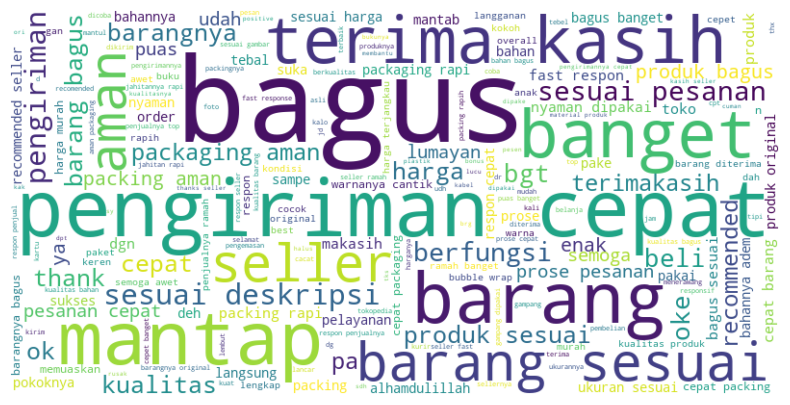

In [77]:
# Word cloud untuk produk yang direkomendasikan oleh user
review_1 = data_cleaned['review_processed'][data_cleaned['sentiment'] == 'Positive'].str.cat(sep=' ')
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(review_1)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.show()

#### **Most Used Words in negative review**

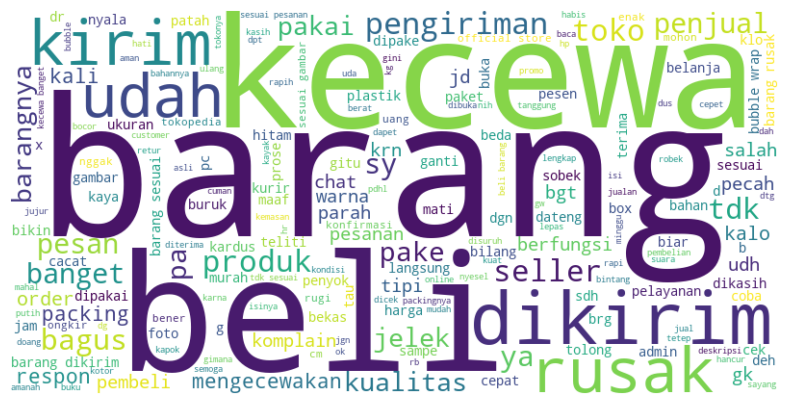

In [78]:
# Word cloud untuk produk yang direkomendasikan oleh user
review_1 = data_cleaned['review_processed'][data_cleaned['sentiment'] == 'Negative'].str.cat(sep=' ')
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(review_1)

# Menggambarkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Model Definition**

In [81]:
nlp_data = deepcopy(data_cleaned[['sentiment', 'customer_review']])
nlp_data.head()

,sentiment,customer_review
0,Positive,Alhamdulillah berfungsi dengan baik. Packaging...
1,Positive,"barang bagus dan respon cepat, harga bersaing ..."
2,Positive,"barang bagus, berfungsi dengan baik, seler ram..."
3,Positive,bagus sesuai harapan penjual nya juga ramah. t...
4,Positive,"Barang Bagus, pengemasan Aman, dapat Berfungsi..."


#### **Target Conversion**

In [82]:
nlp_data['sentiment'] = nlp_data['sentiment'].map({'Positive': 1, 'Negative': 0})

In [83]:
# Seperating our dataset into Independent And Dependent Features 
X=nlp_data.drop('sentiment',axis=1) 
y=nlp_data['sentiment']

In [84]:
y.value_counts(normalize=True)

sentiment
0    0.522344
1    0.477656
Name: proportion, dtype: float64

#### **Split Train and Test**

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values, test_size=.2, random_state=0)

# notes


#### **cek lagi tal kalo lu mau tambahin tambahin aja itu udah tokenazie itu udah gua split tinggal bikin model**